## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Train with common dataset

Link dataset: https://www.kaggle.com/datasets/mdwaquarazam/agricultural-crops-image-classification/data

In [29]:
import zipfile
import os

# Specify the path to the ZIP file
zip_file_path = "/content/archive.zip"

# Specify the extraction directory
extracted_dir = "/content/raw"

# Create the target directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the contents of the extraction directory
extracted_files = os.listdir(extracted_dir)
print("Files extracted successfully:", extracted_files)

Files extracted successfully: ['Agricultural-crops']


In [27]:
!pip install split-folders

In [30]:
#Splitting Input Data into 3 parts that are training,validation,testing
input_folder='/content/raw/Agricultural-crops'
import splitfolders
split_ratio = (0.8, 0.1, 0.1)
splitfolders.ratio(
    input_folder,
    output='content/Data',
    seed=500,
    ratio=split_ratio,
    group_prefix=None,
)

Copying files: 829 files [00:00, 2988.97 files/s]


In [34]:
model = YOLO("yolov8n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
model.train(data="/content/content/Data", epochs=100, imgsz=128)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/content/Data, epochs=100, time=None, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/content/Data/train... 652 images, 0 corrupt: 100%|██████████| 652/652 [00:00<?, ?it/s]
val: Scanning /content/content/Data/val... 72 images, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.759G      3.397         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

                   all      0.181      0.431



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.535G      2.919         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.19it/s]

                   all      0.375      0.694



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.535G      2.236         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.34it/s]

                   all      0.542      0.819



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.535G      1.651         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.23it/s]

                   all      0.722      0.889



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.535G      1.242         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.57it/s]

                   all      0.722      0.903



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.535G      1.038         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.35it/s]

                   all      0.722      0.903



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.537G     0.8393         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.24it/s]

                   all      0.764      0.903



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.535G     0.7277         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.46it/s]

                   all       0.75      0.931



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.535G      0.659         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.99it/s]

                   all      0.722      0.903



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.535G     0.5448         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.16it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.535G     0.5094         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.25it/s]

                   all      0.778      0.931



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.526G     0.4168         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.10it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.526G     0.3686         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.01it/s]

                   all      0.764      0.903



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.524G     0.3551         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.51it/s]

                   all      0.778      0.917



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.524G      0.348         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.29it/s]

                   all       0.75      0.917



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.524G     0.2958         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.76it/s]

                   all      0.764      0.917



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.524G     0.2967         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.01it/s]

                   all      0.792      0.944



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.524G     0.2832         12        128: 100%|██████████| 41/41 [00:05<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.48it/s]

                   all      0.819      0.931



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.524G      0.247         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.43it/s]

                   all       0.75      0.958



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.524G     0.2598         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.82it/s]

                   all      0.792      0.917



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.524G     0.2417         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.21it/s]

                   all      0.778      0.958



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.524G     0.2125         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.16it/s]

                   all      0.778      0.917



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.524G     0.2196         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.86it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.524G     0.2087         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.98it/s]

                   all      0.764      0.931



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.524G     0.1857         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.02it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.524G     0.2244         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.02it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.524G     0.1898         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.01it/s]

                   all      0.806      0.958



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.524G     0.2307         12        128: 100%|██████████| 41/41 [00:05<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.24it/s]

                   all      0.792      0.944



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.524G     0.2104         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.33it/s]

                   all      0.792      0.944



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.524G     0.1548         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.24it/s]


                   all      0.806      0.931

      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.524G     0.1662         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.33it/s]

                   all      0.792      0.917



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.524G     0.1275         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.74it/s]


                   all      0.806      0.931

      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.524G     0.1202         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.48it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.524G     0.1085         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.47it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.524G     0.1344         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.66it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.524G    0.09564         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.62it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.524G     0.1148         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.27it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.524G     0.1399         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.57it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.524G     0.1208         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.48it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.524G     0.1267         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.25it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.524G     0.1124         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.12it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.524G     0.1163         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.86it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.524G     0.1066         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.26it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.524G     0.1044         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.57it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.524G     0.1095         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.35it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.524G     0.1109         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.93it/s]

                   all      0.764      0.944



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.524G     0.1096         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.38it/s]

                   all      0.792      0.944



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.524G      0.129         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.04it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.524G    0.08659         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.91it/s]


                   all      0.792      0.944

      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.524G     0.1297         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.45it/s]

                   all      0.792      0.944



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.524G    0.09569         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.07it/s]

                   all      0.819      0.931



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.524G    0.08165         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.09it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.524G     0.1181         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.66it/s]


                   all      0.806      0.931

      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.524G     0.1161         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.06it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.524G     0.1092         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.44it/s]

                   all      0.764      0.931



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.524G     0.1069         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.36it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.524G     0.1113         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.24it/s]

                   all      0.792      0.917



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.524G    0.08619         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.31it/s]


                   all      0.806      0.917

      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.524G    0.09081         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.32it/s]

                   all      0.778      0.931



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.524G    0.07548         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.70it/s]

                   all      0.778      0.931



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.524G     0.0931         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.47it/s]

                   all      0.778      0.917



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.524G    0.08999         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.57it/s]

                   all      0.764      0.917



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.524G    0.07542         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.73it/s]

                   all       0.75      0.917



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.524G    0.09402         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.16it/s]

                   all      0.778      0.931



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.524G    0.05736         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.61it/s]

                   all      0.792      0.944



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.524G    0.06997         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.49it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.524G    0.08287         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.97it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.524G    0.07764         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.01it/s]

                   all      0.819      0.944



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.524G    0.06961         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.30it/s]

                   all      0.833      0.944



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.524G    0.07791         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.21it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.524G    0.04588         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.01it/s]

                   all      0.792      0.958



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.524G    0.07029         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.42it/s]

                   all      0.819      0.958



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.524G     0.0713         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.93it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.524G      0.088         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.55it/s]

                   all      0.819      0.931



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.524G    0.07058         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.60it/s]

                   all      0.819      0.944



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.524G    0.06573         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.06it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.524G    0.06166         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.87it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.524G      0.071         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.19it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.524G     0.0844         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.52it/s]

                   all      0.778      0.944



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.524G    0.06506         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.71it/s]

                   all      0.778      0.931



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.524G    0.08047         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.46it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.524G    0.07993         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.04it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.524G    0.04565         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.03it/s]

                   all      0.792      0.931



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.524G    0.08181         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.59it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.524G    0.06984         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.96it/s]

                   all      0.806      0.958



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.524G    0.06537         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.37it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.524G    0.05539         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.46it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.524G    0.06203         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.05it/s]

                   all      0.819      0.931



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.524G    0.06108         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.26it/s]

                   all      0.806      0.931



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.524G    0.06141         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.95it/s]

                   all      0.806      0.958



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.524G    0.05086         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.38it/s]

                   all      0.833      0.931



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.524G    0.06479         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 44.16it/s]

                   all      0.819      0.944



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.524G     0.0462         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.73it/s]

                   all      0.819      0.944



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.524G    0.04733         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.25it/s]

                   all      0.833      0.944



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.524G    0.05686         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.14it/s]

                   all      0.806      0.944



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.524G    0.05547         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.49it/s]

                   all      0.819      0.931



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.524G    0.03363         12        128: 100%|██████████| 41/41 [00:07<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.24it/s]

                   all      0.806      0.958



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.524G    0.04373         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.78it/s]

                   all      0.819      0.958



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.524G    0.05359         12        128: 100%|██████████| 41/41 [00:06<00:00,  6.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.35it/s]

                   all      0.819      0.958



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.524G    0.04486         12        128: 100%|██████████| 41/41 [00:06<00:00,  5.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.67it/s]

                   all      0.819      0.931



100 epochs completed in 0.216 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.0MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1473310 parameters, 0 gradients, 3.3 GFLOPs
train: /content/content/Data/train... found 652 images in 30 classes ✅ 
val: /content/content/Data/val... found 72 images in 30 classes ✅ 
test: /content/content/Data/test... found 105 images in 30 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]


                   all      0.819      0.944
Speed: 0.0ms preprocess, 4.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c83309fb970>
curves: []
curves_results: []
fitness: 0.881944477558136
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.819444477558136, 'metrics/accuracy_top5': 0.944444477558136, 'fitness': 0.881944477558136}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.027828746371799048, 'inference': 4.143055942323472, 'loss': 0.0005861123402913412, 'postprocess': 0.0007020102606879341}
task: 'classify'
top1: 0.819444477558136
top5: 0.944444477558136

In [35]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1473310 parameters, 0 gradients, 3.3 GFLOPs
train: /content/content/Data/train... found 652 images in 30 classes ✅ 
val: /content/content/Data/val... found 72 images in 30 classes ✅ 
test: /content/content/Data/test... found 105 images in 30 classes ✅ 


val: Scanning /content/content/Data/val... 72 images, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]


                   all      0.819      0.958
Speed: 1.1ms preprocess, 7.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train32


0.9583333134651184

## Inference with Custom Model

In [38]:
results = model("/content/image15.jpeg")  # predict on an image


image 1/1 /content/image15.jpeg: 128x128 Cherry 0.99, Coffee-plant 0.01, tomato 0.00, Fox_nut(Makhana) 0.00, gram 0.00, 15.9ms
Speed: 5.1ms preprocess, 15.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


In [48]:
pip install matplotlib pillow


Predicted Class: Coffee-plant, Confidence: 1.00


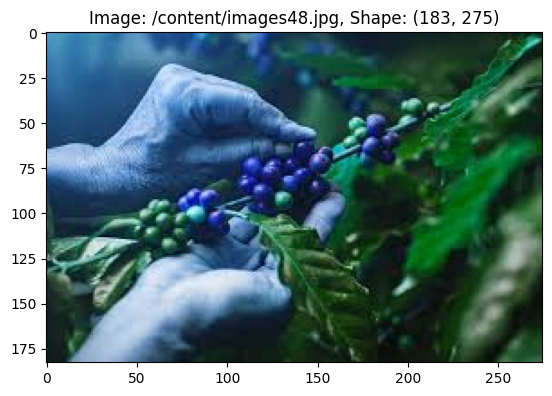

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

result = results[0]

image_path = result.path
original_image = Image.fromarray(result.orig_img)
original_image_shape = result.orig_shape

# Plotting the image
fig, ax = plt.subplots(1)
ax.imshow(original_image)

# If 'probs' object contains confidence scores for each class
probs = result.probs.top1conf.cpu().numpy()  # Assuming 'probs' object holds confidence scores
class_idx = result.probs.top1
class_name = result.names[class_idx]

# Print class name and confidence score
print(f"Predicted Class: {class_name}, Confidence: {probs:.2f}")

# If bounding box information is available in 'boxes' or elsewhere, adapt the code to plot bounding boxes.

plt.title(f"Image: {image_path}, Shape: {original_image_shape}")
plt.show()


In [45]:
results = model("/content/images48.jpg")  # predict on an image


image 1/1 /content/images48.jpg: 128x128 Coffee-plant 1.00, tomato 0.00, wheat 0.00, Cherry 0.00, clove 0.00, 10.2ms
Speed: 4.1ms preprocess, 10.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
